In [ ]:
# this is copied from (20.10)flaovoringr_tb_tfidf

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

In [4]:
xcf_flavordb_tb=pd.read_csv('~/final_flavour/appreciation/datasets/(14.09)xcf_tb_flavordb.csv',index_col=0,converters={'flavordb_ingrs':eval})
ars_flavordb_tb=pd.read_csv('~/final_flavour/appreciation/datasets/(23.09)ars_tb_flavordb.csv',index_col=0,converters={'flavordb_ingr':eval})
kb_flavordb_tb=pd.read_csv('~/final_flavour/appreciation/datasets/(09.07)kb_tb_flavordb.csv',index_col=0,converters={'flavordb_ingr':eval})

In [5]:
xcf_flavordb_tb.rename(columns={'flavordb_ingrs':'flavordb_ingr'},inplace=True)

In [6]:
print(xcf_flavordb_tb.shape)
print(ars_flavordb_tb.shape)
print(kb_flavordb_tb.shape)

(2366, 3)
(2133, 3)
(1864, 3)


In [7]:
xcf_flavordb_tb['class'].value_counts()

1    1327
0    1039
Name: class, dtype: int64

In [8]:
ars_flavordb_tb['class'].value_counts()

1    1199
0     934
Name: class, dtype: int64

In [9]:
kb_flavordb_tb['class'].value_counts()

0    936
1    928
Name: class, dtype: int64

In [10]:
xcf_flavordb_tb=xcf_flavordb_tb.explode('flavordb_ingr').reset_index(drop=True)
ars_flavordb_tb=ars_flavordb_tb.explode('flavordb_ingr').reset_index(drop=True)
kb_flavordb_tb=kb_flavordb_tb.explode('flavordb_ingr').reset_index(drop=True)

In [11]:
xcf_flavordb_tb=pd.DataFrame(xcf_flavordb_tb.groupby(['recipe_id','class'])['flavordb_ingr'].apply(set)).reset_index()
ars_flavordb_tb=pd.DataFrame(ars_flavordb_tb.groupby(['recipe_id','class'])['flavordb_ingr'].apply(set)).reset_index()
kb_flavordb_tb=pd.DataFrame(kb_flavordb_tb.groupby(['recipe_id','class'])['flavordb_ingr'].apply(set)).reset_index()

In [12]:
xcf_flavordb_tb['flavordb_ingr']=xcf_flavordb_tb['flavordb_ingr'].apply(lambda x:sorted(x))
ars_flavordb_tb['flavordb_ingr']=ars_flavordb_tb['flavordb_ingr'].apply(lambda x:sorted(x))
kb_flavordb_tb['flavordb_ingr']=kb_flavordb_tb['flavordb_ingr'].apply(lambda x:sorted(x))

In [13]:
train_df,test_df=train_test_split(ars_flavordb_tb,test_size=0.3,random_state=42)

In [14]:
xcf_flavordb_tb['flavordb_ingr']=[','.join(map(str,ingr)) for ingr in xcf_flavordb_tb['flavordb_ingr']]
ars_flavordb_tb['flavordb_ingr']=[','.join(map(str,ingr)) for ingr in ars_flavordb_tb['flavordb_ingr']]
kb_flavordb_tb['flavordb_ingr']=[','.join(map(str,ingr)) for ingr in kb_flavordb_tb['flavordb_ingr']]

In [15]:
tfidf_transformer=TfidfVectorizer()

In [16]:
def tt_tfidf_vectorizer(data,col1,col2):
    # split train and test split
    train_df,test_df,train_y,test_y=train_test_split(data[col1],data[col2],test_size=0.3,random_state=42)
    # transform tfidf vector
    train_X=tfidf_transformer.fit_transform(train_df)
    test_X=tfidf_transformer.transform(test_df)
    train_X=train_X.toarray()
    test_X=test_X.toarray()
    
    #train_X_df=pd.DataFrame(train_X)
    #test_X_df=pd.DataFrame(test_X)
    
    #train_X_df.columns=tfidf_transformer.get_feature_names()
    #test_X_df.columns=tfidf_transformer.get_feature_names()
    
    return train_X,test_X,train_y,test_y

In [17]:
def tt_tfidf_df(data,col1,col2):
    # split train and test split
    train_df,test_df,train_y,test_y=train_test_split(data[col1],data[col2],test_size=0.3,random_state=42)
    # transform tfidf vector
    train_X=tfidf_transformer.fit_transform(train_df)
    test_X=tfidf_transformer.transform(test_df)
    train_X=train_X.toarray()
    test_X=test_X.toarray()
    
    train_X_df=pd.DataFrame(train_X)
    test_X_df=pd.DataFrame(test_X)
    
    train_X_df.columns=tfidf_transformer.get_feature_names()
    test_X_df.columns=tfidf_transformer.get_feature_names()
    
    return train_X_df,test_X_df,train_y,test_y

In [18]:
xcf_train_X,xcf_test_X,xcf_train_y,xcf_test_y=tt_tfidf_vectorizer(xcf_flavordb_tb,'flavordb_ingr','class')
ars_train_X,ars_test_X,ars_train_y,ars_test_y=tt_tfidf_vectorizer(ars_flavordb_tb,'flavordb_ingr','class')
kb_train_X,kb_test_X,kb_train_y,kb_test_y=tt_tfidf_vectorizer(kb_flavordb_tb,'flavordb_ingr','class')

In [19]:
xcf_train_X_df,xcf_test_X_df,xcf_train_y,xcf_test_y=tt_tfidf_df(xcf_flavordb_tb,'flavordb_ingr','class')
ars_train_X_df,ars_test_X_df,ars_train_y,ars_test_y=tt_tfidf_df(ars_flavordb_tb,'flavordb_ingr','class')
kb_train_X_df,kb_test_X_df,kb_train_y,kb_test_y=tt_tfidf_df(kb_flavordb_tb,'flavordb_ingr','class')

In [20]:
xcf_train_X_df.head()

,abalone,agar,alfalfa,allspice,almond,amaranth,american_butterfish,angelica,apple,apricot,...,walnut,wasabi,water,water_chestnut,welsh_onion,wheat,white_wine,wholewheat_bread,wonton_wrapper,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.428475,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.294278,0.0,0.372737,0.0,0.0,0.0,0.0,0.0


In [23]:
xcf_train_X_df['class']=pd.Series(xcf_train_y.values)
ars_train_X_df['class']=pd.Series(ars_train_y.values)
kb_train_X_df['class']=pd.Series(kb_train_y.values)

In [24]:
xcf_test_X_df['class']=pd.Series(xcf_test_y.values)
ars_test_X_df['class']=pd.Series(ars_test_y.values)
kb_test_X_df['class']=pd.Series(kb_test_y.values)

In [48]:
xcf_train_X_df.to_csv('~/final_flavour/appreciation/app_datasets/xcf_ingr_train_df.csv')
ars_train_X_df.to_csv('~/final_flavour/appreciation/app_datasets/ars_ingr_train_df.csv')
kb_train_X_df.to_csv('~/final_flavour/appreciation/app_datasets/kb_ingr_train_df.csv')

In [49]:
xcf_test_X_df.to_csv('~/final_flavour/appreciation/app_datasets/xcf_ingr_test_df.csv')
ars_test_X_df.to_csv('~/final_flavour/appreciation/app_datasets/ars_ingr_test_df.csv')
kb_test_X_df.to_csv('~/final_flavour/appreciation/app_datasets/kb_ingr_test_df.csv')

In [27]:
xcf_train_X_df.head()

,abalone,agar,alfalfa,allspice,almond,amaranth,american_butterfish,angelica,apple,apricot,...,wasabi,water,water_chestnut,welsh_onion,wheat,white_wine,wholewheat_bread,wonton_wrapper,yogurt,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.428475,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.294278,0.0,0.372737,0.0,0.0,0.0,0.0,0.0,1


In [28]:
print(xcf_train_X.shape)
print(xcf_test_X.shape)

(1656, 251)
(710, 251)


In [29]:
print(ars_train_X.shape)
print(ars_test_X.shape)

(1493, 264)
(640, 264)


In [30]:
print(kb_train_X.shape)
print(kb_test_X.shape)

(1304, 287)
(560, 287)


In [31]:
# NB
def NB_pipeline(train_X,test_X,train_y,test_y):
    nb = MultinomialNB()
    cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=9527)
    nb_cv_results=cross_val_score(nb,train_X,train_y,cv=cv)
    nb.fit(train_X,train_y)
    y_pred=nb.predict(test_X)
    print('Mean Accuracy: %0.2f (+/- %0.2f)' % (nb_cv_results.mean(), nb_cv_results.std() * 2))
    print('Accuracy on test set: %0.2f' % accuracy_score(y_pred,test_y))
    return y_pred

In [32]:
# logistic regression
def log_pipeline(train_X,test_X,train_y,test_y):
    clf=LogisticRegression(random_state=9527)
    param_distribs={'C':[0.1,1,10,100,1000],
                    'solver':['lbfgs','sag']}
    log_search=RandomizedSearchCV(clf,param_distribs,n_iter=50,cv=5,n_jobs=-1)
    log_search.fit(train_X,train_y)
    print('Best parameters:',log_search.best_params_)
    print('Best estimatro:',log_search.best_estimator_)
    print('Best score:',log_search.best_score_)
    log=log_search.best_estimator_
    y_pred=log.predict(test_X)
    print('accuracy score: ',accuracy_score(y_pred,test_y))
    return y_pred

In [33]:
# random forest
def rf_pipeline(train_X,test_X,train_y,test_y):
    clf=RandomForestClassifier(random_state=42)
    param_distribs={'n_estimators':[int(x) for x in np.linspace(start = 300, stop = 500, num = 10)],
                    'max_features':['auto','sqrt','log2'],
                    'max_depth':[5,6,7,8,9,10],
                    'criterion':['gini','entropy']}
    random_search = RandomizedSearchCV(clf,param_distribs,n_iter=50,cv=5,n_jobs=-1)
    random_search.fit(train_X,train_y)
    print('Best parameters:',random_search.best_params_)
    print('Best estimatro:',random_search.best_estimator_)
    print('Best score:',random_search.best_score_)
    rf=random_search.best_estimator_
    rf.fit(train_X,train_y)
    y_pred=rf.predict(test_X)
    print('accuracy score: ',accuracy_score(y_pred,test_y))
    return y_pred

In [34]:
xcf_nby_pred=NB_pipeline(xcf_train_X,xcf_test_X,xcf_train_y,xcf_test_y)

Mean Accuracy: 0.62 (+/- 0.02)
Accuracy on test set: 0.62


In [35]:
xcf_logy_pred=log_pipeline(xcf_train_X,xcf_test_X,xcf_train_y,xcf_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters: {'solver': 'lbfgs', 'C': 1}
Best estimatro: LogisticRegression(C=1, random_state=9527)
Best score: 0.6334583045171623
accuracy score:  0.652112676056338


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

In [36]:
xcf_rfy_pred=rf_pipeline(xcf_train_X,xcf_test_X,xcf_train_y,xcf_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Best estimatro: RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)
Best score: 0.6690841917519019
accuracy score:  0.6746478873239437


In [37]:
ars_nby_pred=NB_pipeline(ars_train_X,ars_test_X,ars_train_y,ars_test_y)

Mean Accuracy: 0.66 (+/- 0.04)
Accuracy on test set: 0.67


In [38]:
ars_log_pred=log_pipeline(ars_train_X,ars_test_X,ars_train_y,ars_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters: {'solver': 'lbfgs', 'C': 1}
Best estimatro: LogisticRegression(C=1, random_state=9527)
Best score: 0.6717739220219524
accuracy score:  0.696875


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
ars_rf_pred=rf_pipeline(ars_train_X,ars_test_X,ars_train_y,ars_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'entropy'}
Best estimatro: RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=500, random_state=42)
Best score: 0.6510224237390856
accuracy score:  0.6765625


In [40]:
kb_nby_pred=NB_pipeline(kb_train_X,kb_test_X,kb_train_y,kb_test_y)

Mean Accuracy: 0.60 (+/- 0.04)
Accuracy on test set: 0.62


In [41]:
kb_log_pred=log_pipeline(kb_train_X,kb_test_X,kb_train_y,kb_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters: {'solver': 'lbfgs', 'C': 0.1}
Best estimatro: LogisticRegression(C=0.1, random_state=9527)
Best score: 0.6111936339522547
accuracy score:  0.625


In [42]:
kb_rf_pred=rf_pipeline(kb_train_X,kb_test_X,kb_train_y,kb_test_y)

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best parameters: {'n_estimators': 322, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Best estimatro: RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=322,
                       random_state=42)
Best score: 0.620377247273799
accuracy score:  0.6071428571428571


In [ ]:
# learning curve

In [43]:
# Learning curve
def plot_cv_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

In [44]:
xcf_rf=RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)
ars_log=LogisticRegression(C=1, random_state=9527)
kb_log=LogisticRegression(C=0.1, random_state=9527)

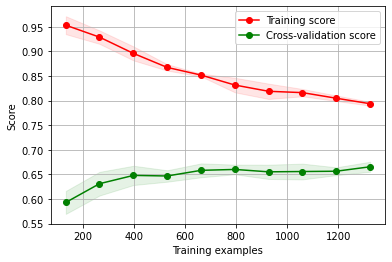

In [45]:
plot_cv_learning_curve(xcf_rf, '', xcf_train_X, xcf_train_y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('fig/pdf/xcf_tfidf_tb_rf_lc.pdf',dpi=300,bbox_inches='tight')
plt.savefig('fig/png/xcf_tfidf_tb_rf_lc.png',dpi=300,bbox_inches='tight')

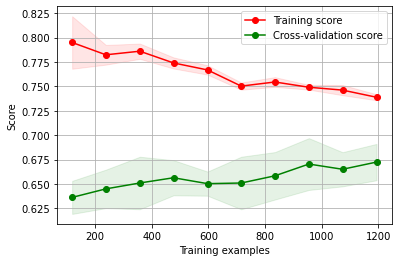

In [46]:
plot_cv_learning_curve(ars_log, '', ars_train_X, ars_train_y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('fig/pdf/ars_tfidf_tb_log_lc.pdf',dpi=300,bbox_inches='tight')
plt.savefig('fig/png/ars_tfidf_tb_log_lc.png',dpi=300,bbox_inches='tight')

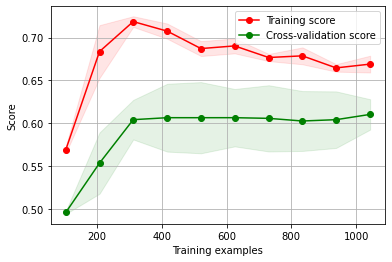

In [47]:
plot_cv_learning_curve(kb_log, '', kb_train_X, kb_train_y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('fig/pdf/kb_tfidf_tb_log_lc.pdf',dpi=300,bbox_inches='tight')
plt.savefig('fig/png/kb_tfidf_tb_log_lc.png',dpi=300,bbox_inches='tight')